In [17]:
# Use seaborn for pairplot.
#!pip install -q seaborn
#!conda install -y tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.1


In [8]:
url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_weekly_CSV.zip'

raw_dataset = pd.read_csv(url, skiprows = 3, index_col=0, nrows=1100)

In [9]:
dataset = raw_dataset.copy()

dataset.tail()

,Mkt-RF,SMB,HML,RF
19470703,3.14,0.65,1.71,0.007
19470711,1.91,1.42,0.52,0.007
19470718,0.03,0.06,-0.09,0.007
19470725,1.60,0.46,1.57,0.007
19470801,-1.90,-1.43,-1.04,0.007


In [10]:
train_features = [np.array(dataset['SMB']), np.array(dataset['HML']),np.array(dataset['RF'])]
# train_features = np.array(train_features)

train_features = np.transpose(train_features)

In [11]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[0.077 0.112 0.02 ]]


2023-04-18 10:10:17.034776: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [12]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,160
Trainable params: 17,153
Non-trainable params: 7
_________________________________________________________________


In [13]:
%%time
history = dnn_model.fit(
    train_features,
    np.array(dataset['Mkt-RF']),
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 26.7 s, sys: 2.1 s, total: 28.8 s
Wall time: 24 s


In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
995,1.422965,1.381370,995
996,1.427732,1.380402,996
997,1.414320,1.279207,997
998,1.467958,1.326331,998
999,1.429161,1.352413,999


In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

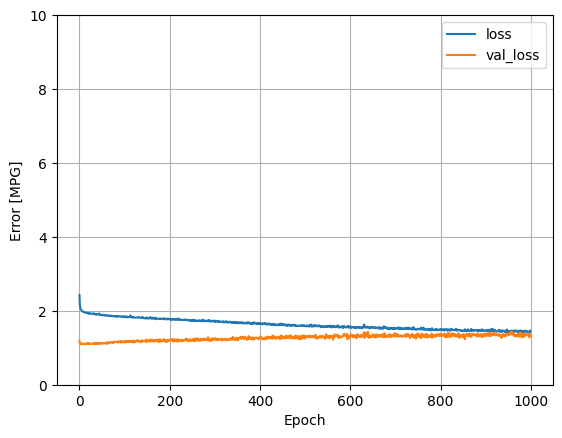

In [16]:
plot_loss(history)